<a href="https://colab.research.google.com/github/SeongYunHong/Mirae-Python/blob/main/09_data_aggregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 분석

1.   요약/집계 분석 :
 * agg
 * value_counts
 * groupby
 * cross_tab
 * pivot
 * pivot_table
2.   탐색적 분석
 * visualization(matplotlib(이산적 데이터, 연속적 데이터, 2D, 3D) -> seaborn
 * pandas backend : matplotlib, plotly
3.   추론 분석
 * 카이제곱 분석(카이제곱 분포)
 * 평균 분석(t 분포)
 * anova(F 분포)
4.   예측 분석
 *시계열 분석
5.   인과성 분석
 * 회귀 분석
 * 상관 분석
6.   작용성 분석
 * hyper parameter tuning
 * backtracking



데이터 요약 : 범주형 데이터

index columns values

범주를 열로 행으로 배치한 다음 table로 변환

In [ ]:
import pandas as pd
import numpy as np
df=pd.DataFrame({"범주":["A","B","C","A","B"]})
df=pd.get_dummies(df,columns=["범주"])
#df=pd.factorize(df["범주"])
#df["범주"]=pd.Categorical(df["범주"])
print(df)

   범주_A  범주_B  범주_C
0     1     0     0
1     0     1     0
2     0     0     1
3     1     0     0
4     0     1     0


In [ ]:
df=pd.DataFrame({"data":[1,2,3,4,5]})
#df.mean()
df.agg(["mean","std","skew","kurt",'sum',np.mean,np.median,np.max]).T

,mean,std,skew,kurt,sum
data,3.0,1.581139,0.0,-1.2,15.0


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/mirae/coursea_data.csv')
df.head(10)

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
5,661,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39k
6,54,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350k
7,488,AI For Medical Treatment,deeplearning.ai,COURSE,4.8,Intermediate,2.4k
8,58,AI Foundations for Everyone,IBM,SPECIALIZATION,4.7,Beginner,61k
9,129,AI for Medical Diagnosis,deeplearning.ai,COURSE,4.7,Intermediate,12k


In [ ]:
df.apply(pd.unique)
#df.nunique()

Unnamed: 0                  [134, 743, 874, 413, 635, 661, 54, 488, 58, 12...
course_title                [(ISC)² Systems Security Certified Practitione...
course_organization         [(ISC)², University of Pennsylvania, Johns Hop...
course_Certificate_type     [SPECIALIZATION, COURSE, PROFESSIONAL CERTIFIC...
course_rating               [4.7, 4.5, 4.8, 4.6, 4.3, 4.4, 4.9, 4.2, 5.0, ...
course_difficulty                   [Beginner, Intermediate, Mixed, Advanced]
course_students_enrolled    [5.3k, 17k, 130k, 91k, 320k, 39k, 350k, 2.4k, ...
dtype: object

<Axes: >

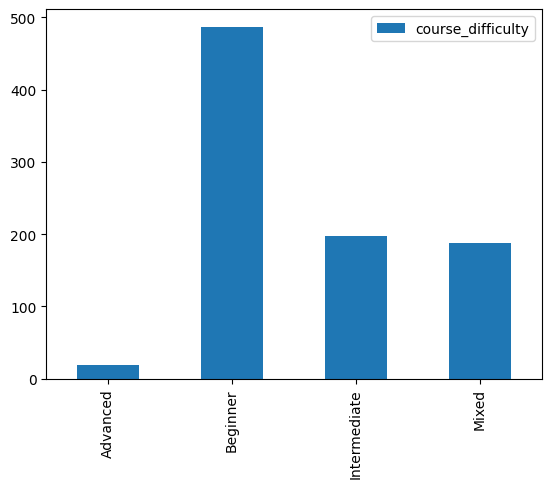

In [ ]:
#df['course_difficulty'].value_counts()
#df['course_difficulty'].value_counts(ascending=True) #값을 정렬
#df['course_difficulty'].value_counts(ascending=True).sort_index(ascending=True) #인덱스 정렬
#df['course_difficulty'].value_counts(ascending=True).sort_index(ascending=True).to_frame() #데이터 프레임으로 변환
df['course_difficulty'].value_counts(ascending=True).sort_index(ascending=True).to_frame().plot(kind='bar') #bar로 출력

In [ ]:
arrays = [['학교1', '학교1', '학교1', '학교1', '학교2', '학교2', '학교3', '학교3'],
          ['1반', '2반', '1반', '2반', '1반', '2반', '1반', '2반']] #2차원 리스트
index=pd.MultiIndex.from_arrays(arrays,names=['first','second']) #arrays 앞에 리스트가 first, 뒤에 리스트가 second
df=pd.DataFrame({"합격":[1,1,1,1,2,2,3,3],"등수":np.arange(8)}, index=index)
df

합격  등수
first second        
학교1   1반       1   0
      2반       1   1
      1반       1   2
      2반       1   3
학교2   1반       2   4
      2반       2   5
학교3   1반       3   6
      2반       3   7

In [ ]:
grouped=df.groupby(level=0) #level=0 : 학교별로 / level=1 : 반별로
print(grouped)
grouped.sum() #학교별

,합격,등수
first,,
학교1,4,6
학교2,4,9
학교3,6,13


In [ ]:
df.groupby(level=1).sum() #반별로

,합격,등수
second,,
1반,7,12
2반,7,16


In [ ]:
df.groupby(level=[0,1]).sum() #6가지 경우의 수

합격  등수
first second        
학교1   1반       2   2
      2반       2   4
학교2   1반       2   4
      2반       2   5
학교3   1반       3   6
      2반       3   7

In [ ]:
index=pd.date_range('10/1/1999',periods=1100) #1999년 10월 1일로부터 1100일까지
ts_origin=pd.Series(np.random.normal(0.5,2,1100),index) #시리즈로 만들면서 인덱스(날짜가 행 이름)로 줌
print(ts_origin.shape) #(1100,)
print(ts_origin.head())
print("-------------------/")
#rolling(이동평균법(이평)) : 5일이평, 20일이평, 60이평, 120이평.....
#평균을 내서 데이터를 표현하는 이유(이평을 쓰는 이유) : 고주파가 저주파로 변함(완만하게 표)
ts=ts_origin.rolling(window=100,min_periods=100).mean().dropna() #100(window)일을 평균을 내서 데이터를 재표현, min_periods : 100부터 시작하라(100개의 평균을 내야하는데 0~99번까지는 평균을 낼 수 없어서 데이터가 날아감)
print(ts.shape) #(1001,)
print(ts.head())
print("-------------------/")
ts.tail()

(1100,)
1999-10-01    0.956751
1999-10-02   -0.836350
1999-10-03    6.488488
1999-10-04   -0.958092
1999-10-05    0.317640
Freq: D, dtype: float64
-------------------/
(1001,)
2000-01-08    0.158634
2000-01-09    0.177761
2000-01-10    0.183260
2000-01-11    0.123872
2000-01-12    0.130361
Freq: D, dtype: float64
-------------------/


2002-09-30    0.342521
2002-10-01    0.347421
2002-10-02    0.337112
2002-10-03    0.317880
2002-10-04    0.269332
Freq: D, dtype: float64

groupby에 적용 가능한 명령어
* aggregation
* transformation
* filter

In [ ]:
#인덱스 -> 날짜데이터라서 연도별로 groupby 가능
#Z점수 정규화로 데이터 변형
transformed=(ts.groupby(lambda x:x.year).transform(lambda x: (x-x.mean())/x.std())) #groupby 한 후 transform
transformed

2000-01-08   -0.979345
2000-01-09   -0.860568
2000-01-10   -0.826421
2000-01-11   -1.195220
2000-01-12   -1.154924
                ...   
2002-09-30   -1.325140
2002-10-01   -1.271083
2002-10-02   -1.384810
2002-10-03   -1.596970
2002-10-04   -2.132537
Freq: D, Length: 1001, dtype: float64

In [ ]:
#연도별로 그룹화해서 평균을 구하기
grouped=ts.groupby(lambda x : x.year)
grouped.mean()

2000    0.316340
2001    0.461405
2002    0.462642
dtype: float64

<Axes: >

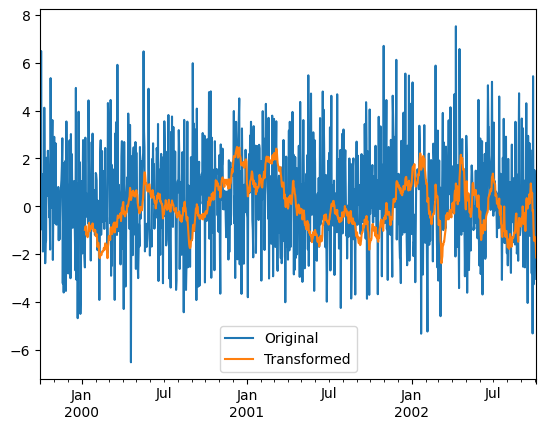

In [ ]:
#고주파 데이터 : 이동평균법을 적용하여 저주파, z점수 정규화
compare=pd.DataFrame({"Original":ts_origin,"Transformed":transformed})
compare.plot()

In [ ]:
#요소들의 합이 3이상인 것들만 출력
sf=pd.Series([1,1,2,3,3,3])
sf.groupby(sf).filter(lambda x : x.sum()>2)

3    3
4    3
5    3
dtype: int64

In [ ]:
import seaborn as sns
planets=sns.load_dataset('planets')
planets.shape
planets.nunique()

method             10
number              7
orbital_period    988
mass              381
distance          552
year               23
dtype: int64

In [ ]:
#발견 방식, 개수, 궤도 주기, 질량, 거리, 년도
planets.apply(pd.unique)

method            [Radial Velocity, Imaging, Eclipse Timing Vari...
number                                        [1, 2, 3, 5, 4, 6, 7]
orbital_period    [269.3, 874.774, 763.0, 326.03, 516.22, 185.84...
mass              [7.1, 2.21, 2.6, 19.4, 10.5, 4.8, 4.64, nan, 1...
distance          [77.4, 56.95, 19.84, 110.62, 119.47, 76.39, 18...
year              [2006, 2008, 2011, 2007, 2009, 2002, 1996, 201...
dtype: object

In [ ]:
planets.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [ ]:
#method 별 orbital_period에 대한 평균값을 구해보시오
#각 그룹별 개수를 확인해 보시오

planets.groupby('method')['orbital_period'].mean()

method
Astrometry                          631.180000
Eclipse Timing Variations          4751.644444
Imaging                          118247.737500
Microlensing                       3153.571429
Orbital Brightness Modulation         0.709307
Pulsar Timing                      7343.021201
Pulsation Timing Variations        1170.000000
Radial Velocity                     823.354680
Transit                              21.102073
Transit Timing Variations            79.783500
Name: orbital_period, dtype: float64

In [ ]:
planets.groupby('method')['method'].count()

method
Astrometry                         2
Eclipse Timing Variations          9
Imaging                           38
Microlensing                      23
Orbital Brightness Modulation      3
Pulsar Timing                      5
Pulsation Timing Variations        1
Radial Velocity                  553
Transit                          397
Transit Timing Variations          4
Name: method, dtype: int64

In [ ]:
#원래 데이터가 group에 들어있음
for(method,group) in planets.groupby('method'):
  print("{0:30s}shape{1}".format(method,group.shape))

Astrometry                    shape(2, 6)
Eclipse Timing Variations     shape(9, 6)
Imaging                       shape(38, 6)
Microlensing                  shape(23, 6)
Orbital Brightness Modulation shape(3, 6)
Pulsar Timing                 shape(5, 6)
Pulsation Timing Variations   shape(1, 6)
Radial Velocity               shape(553, 6)
Transit                       shape(397, 6)
Transit Timing Variations     shape(4, 6)


In [ ]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

In [ ]:
#문제
#반별, 최소값, 중위수, 최대값을 구하시오
rng=np.random.RandomState(0) #RandomState : 시드값 지정해줘서 같은 결과 출력하게
df=pd.DataFrame({"key":['1반','2반','3반','1반','2반','3반'],"국어":rng.randint(80,100,6),"수학":rng.randint(90,100,6)},columns=['key','국어','수학'])
df

,key,국어,수학
0,1반,92,99
1,2반,95,93
2,3반,80,95
3,1반,83,92
4,2반,83,94
5,3반,87,97


In [ ]:
df.groupby('key').min() #반으로 묶고 그 중에 최소값 추출
df.groupby('key').median()
df.groupby('key').max()

,국어,수학
key,,
1반,92,99
2반,95,94
3반,87,97


In [ ]:
df.groupby('key').aggregate(['min',np.median,'max'])

국어             수학           
    min median max min median max
key                              
1반   83   87.5  92  92   95.5  99
2반   83   89.0  95  93   93.5  94
3반   80   83.5  87  95   96.0  97

In [ ]:
df.groupby('key').aggregate({'국어':'min','수학':'max'})

,국어,수학
key,,
1반,83,99
2반,83,94
3반,80,97


In [ ]:
#문제
#수학의 표준편차가 1보다 큰 데이터만 출력하시오

#filtering 대상 모든 행에 대해서 판단
def filter_func(x):
  return x['수학'].std()>1
df.groupby('key').filter(filter_func)
#df.groupby('key').filter(lambda x: x['수학'].std()>1)

,key,국어,수학
0,1반,92,99
2,3반,80,95
3,1반,83,92
5,3반,87,97


In [ ]:
flights=sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<ipython-input-32-ea64c3425596>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights.groupby(flights['year']).sum().plot.bar()


<Axes: xlabel='year'>

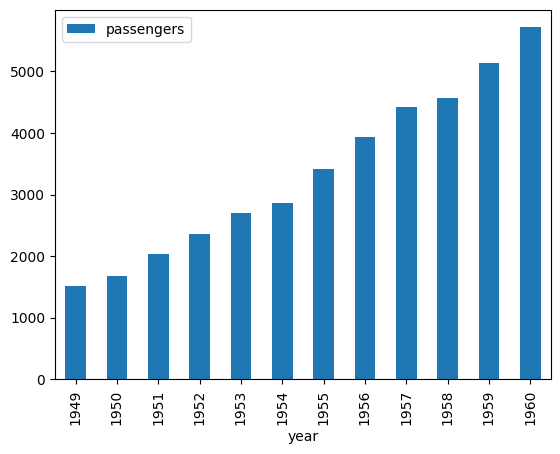

In [ ]:
flights.groupby(flights['year']).sum().plot.bar()

<Axes: xlabel='month'>

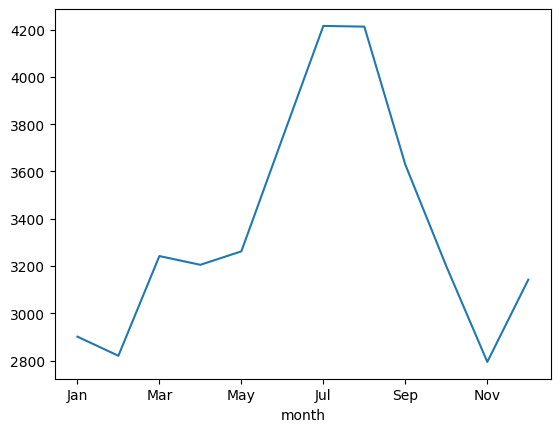

In [ ]:
#문제
#승객 수를 월별로 합계 내고 출력
flights['passengers'].groupby(flights['month']).sum().plot()

crosstab

In [ ]:
df = pd.DataFrame({'A' : ['일반', '일반', '특수', '예외'] * 6,
                   'B' : ['서울', '대구', '부산'] * 8,
                   'C' : ['건조', '건조', '건조', '우기', '우기', '우기'] * 4,
                   'D' : np.random.randn(24),
                   'E' : np.random.randn(24)})
print(df)

     A   B   C         D         E
0   일반  서울  건조 -1.878244  0.238354
1   일반  대구  건조 -1.198766  1.408303
2   특수  부산  건조  1.186894 -1.012432
3   예외  서울  우기  0.978061 -1.782331
4   일반  대구  우기  1.651483  0.557687
5   일반  부산  우기  0.255784  0.349180
6   특수  서울  건조  1.904097  1.396550
7   예외  대구  건조 -0.306010  0.275640
8   일반  부산  건조  0.857828 -0.931580
9   일반  서울  우기  0.199077  1.315085
10  특수  대구  우기  0.048781  0.035614
11  예외  부산  우기 -0.566876  1.939176
12  일반  서울  건조 -1.369289 -0.211444
13  일반  대구  건조  0.507639  0.778586
14  특수  부산  건조 -0.047533 -1.574900
15  예외  서울  우기  0.331389  1.670845
16  일반  대구  우기  0.351509 -0.864786
17  일반  부산  우기  0.333704 -1.190305
18  특수  서울  건조  0.479818 -0.854008
19  예외  대구  건조 -0.211887  0.772395
20  일반  부산  건조 -0.033431  0.217206
21  일반  서울  우기 -0.212098 -1.292589
22  특수  대구  우기 -0.518591  1.033748
23  예외  부산  우기  0.974481 -0.370092


In [ ]:
df.nunique()

A     3
B     3
C     2
D    24
E    24
dtype: int64

In [ ]:
pd.crosstab(df.A,df.C,margins=True) #margins : 행 열 합계 출력

C,건조,우기,All
A,,,
예외,2,4,6
일반,6,6,12
특수,4,2,6
All,12,12,24


In [ ]:
pd.crosstab(df.A,df.B,normalize=True)

B,대구,부산,서울
A,,,
예외,0.083333,0.083333,0.083333
일반,0.166667,0.166667,0.166667
특수,0.083333,0.083333,0.083333


In [ ]:
#계층적 인덱스 지원(MultiIndex) : 디폴트 값 : 카운트
pd.crosstab([df.A,df.B],df.C,margins=True)

C       건조  우기  All
B   A              
대구  예외   2   0    2
    일반   2   2    4
    특수   0   2    2
부산  예외   0   2    2
    일반   2   2    4
    특수   2   0    2
서울  예외   0   2    2
    일반   2   2    4
    특수   2   0    2
All     12  12   24

In [ ]:
#중복되는 데이터가 있을 수 있음
#행, 열, 밸류
pd.crosstab(df.A,df.B,df.D,aggfunc=np.mean)

B,대구,부산,서울
A,,,
예외,-0.487287,1.093221,0.058539
일반,0.275561,-0.058529,-0.512000
특수,0.428412,1.224314,0.380467


In [ ]:
#데이터를 저장하고 로딩하시오
#과목별로 패스여부를 확인하시오
#과목별로 대분류하고 시험별로 소분류된 패스여부를 카운트하고 합계를 출력하시오
#시험별로 패스여부 확인하시오

d = {
    'Name':['영구','일구','이구','삼구','사구','오구', '영구','일구','일구','이구','삼구','사구'],
    'Exam':['중간고사','중간고사','중간고사','중간고사','중간고사','중간고사', '기말고사','기말고사','기말고사','기말고사','기말고사','기말고사'],

    'Subject':['수학','수학','수학','과학','과학','과학',  '수학','수학','수학','과학','과학','과학'],
    'Result':['Pass','Pass','Fail','Pass','Fail','Pass','Pass','Fail','Fail','Pass','Pass','Fail'],
    'Jumsu' : [ 100,80,50,70.,55,80,100,40,50,100,80,30]

}
df = pd.DataFrame(d,columns=['Name','Exam','Subject','Result','Jumsu'])
df.to_csv("/content/drive/MyDrive/jumsu.csv",index=False,header=False,encoding="UTF-8")
df=pd.read_csv("/content/drive/MyDrive/jumsu.csv",names=["Name","Exam","Subject","Result","Jumsu"],encoding="UTF-8")

In [ ]:
df.head()

,Name,Exam,Subject,Result,Jumsu
0,영구,중간고사,수학,Pass,100.0
1,일구,중간고사,수학,Pass,80.0
2,이구,중간고사,수학,Fail,50.0
3,삼구,중간고사,과학,Pass,70.0
4,사구,중간고사,과학,Fail,55.0


In [ ]:
df.groupby('Subject')['Result'].count()

Subject
과학    6
수학    6
Name: Result, dtype: int64

In [ ]:
pd.crosstab(df.Subject,df.Result,margins=True)

Result,Fail,Pass,All
Subject,,,
과학,2,4,6
수학,3,3,6
All,5,7,12


In [ ]:
pd.crosstab([df.Subject,df.Exam],df.Result,margins=True)

Result        Fail  Pass  All
Subject Exam                 
과학      기말고사     1     2    3
        중간고사     1     2    3
수학      기말고사     2     1    3
        중간고사     1     2    3
All              5     7   12

In [ ]:
pd.crosstab(df.Exam,df.Result,margins=True)

Result,Fail,Pass,All
Exam,,,
기말고사,3,3,6
중간고사,2,4,6
All,5,7,12


카이제곱

In [ ]:
#crosstab을 이용한 카이제곱 분석
from scipy import stats
#데이터프레임 생성
df=pd.DataFrame({"성별":["남성","여성","남성","여성","남성"], "만족도":["만족","만족","불만족","불만족","만족"]})
crosstab=pd.crosstab(df["성별"],df["만족도"])
chi2,p,dof,expected=stats.chi2_contingency(crosstab)
print("카이제곱 통계량 : ",chi2) #카이제곱 : (기대값-실제값)**2/기대값
print("p-value : ",p) #귀무가설 기각 못함(p-value > 0.05)
print("자유도 : ",dof) #자유도에 따라서 카이제곱 그래프가 달라
print("기대치 :",expected)

카이제곱 통계량 :  0.0
p-value :  1.0
자유도 :  1
기대치 : [[1.8 1.2]
 [1.2 0.8]]


pivot: 계층적 인덱스 지원x

In [ ]:
df = pd.DataFrame({"foo": ['one', 'one-1', 'two', 'two'],
                    "bar": ['A', 'A', 'B', 'C'],
                    "baz": [1, 2, 3, 4]})
df

,foo,bar,baz
0,one,A,1
1,one-1,A,2
2,two,B,3
3,two,C,4


In [ ]:
df.pivot(index='foo',columns='bar',values='baz')

bar,A,B,C
foo,,,
one,1.0,NaN,NaN
one-1,2.0,NaN,NaN
two,NaN,3.0,4.0


pivot_tabel

In [ ]:
path='/content/drive/MyDrive/mirae/sales-funnel.xlsx'
df=pd.read_excel(path)
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [ ]:
df.dtypes

Account      int64
Name        object
Rep         object
Manager     object
Product     object
Quantity     int64
Price        int64
Status      object
dtype: object

In [ ]:
df['Status'].unique()

array(['presented', 'pending', 'declined', 'won'], dtype=object)

In [ ]:
df['Status']=df['Status'].astype("category")
df.dtypes

Account        int64
Name          object
Rep           object
Manager       object
Product       object
Quantity       int64
Price          int64
Status      category
dtype: object

In [ ]:
pd.pivot_table(df,index=["Name"]) #숫자 데이터만 이용해서 테이블 형성

<ipython-input-53-f57b56048235>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(df,index=["Name"]) #숫자 데이터만 이용해서 테이블 형성


,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [ ]:
df['Manager'].unique()

array(['Debra Henley', 'Fred Anderson'], dtype=object)

In [ ]:
#모든 열에 다 적용
#Name : 판매원(12)
#Manager : 매니저(2명)
pd.pivot_table(df,index=["Name"],columns=["Manager"])

<ipython-input-55-00b94dcb22c0>:4: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(df,index=["Name"],columns=["Manager"])


Account                      Price  \
Manager                      Debra Henley Fred Anderson Debra Henley   
Name                                                                   
Barton LLC                       740150.0           NaN      35000.0   
Fritsch, Russel and Anderson     737550.0           NaN      35000.0   
Herman LLC                            NaN      141962.0          NaN   
Jerde-Hilpert                    412290.0           NaN       5000.0   
Kassulke, Ondricka and Metz           NaN      307599.0          NaN   
Keeling LLC                           NaN      688981.0          NaN   
Kiehn-Spinka                     146832.0           NaN      65000.0   
Koepp Ltd                             NaN      729833.0          NaN   
Kulas Inc                        218895.0           NaN      25000.0   
Purdy-Kunde                           NaN      163416.0          NaN   
Stokes LLC                            NaN      239344.0          NaN   
Trantow-Barrows                  714466.0           NaN      15000.0   

                                               Quantity                
Manager                      Fred Anderson Debra Henley Fred Anderson  
Name                                                                   
Barton LLC                             NaN     1.000000           NaN  
Fritsch, Russel and Anderson           NaN     1.000000           NaN  
Herman LLC                         65000.0          NaN           2.0  
Jerde-Hilpert                          NaN     2.000000           NaN  
Kassulke, Ondricka and Metz         7000.0          NaN           3.0  
Keeling LLC                       100000.0          NaN           5.0  
Kiehn-Spinka                           NaN     2.000000           NaN  
Koepp Ltd                          35000.0          NaN           2.0  
Kulas Inc                              NaN     1.500000           NaN  
Purdy-Kunde                        30000.0          NaN           1.0  
Stokes LLC                          7500.0          NaN           1.0  
Trantow-Barrows                        NaN     1.333333           NaN

In [ ]:
pd.pivot_table(df,index=["Name"],columns=["Manager"],values=['Price'],aggfunc=np.sum) #values 지정 안하면 전체 출력 #중복이 되어도 aggfunc으로 합계 계산 가능

Price              
Manager                      Debra Henley Fred Anderson
Name                                                   
Barton LLC                        35000.0           NaN
Fritsch, Russel and Anderson      35000.0           NaN
Herman LLC                            NaN       65000.0
Jerde-Hilpert                      5000.0           NaN
Kassulke, Ondricka and Metz           NaN        7000.0
Keeling LLC                           NaN      100000.0
Kiehn-Spinka                      65000.0           NaN
Koepp Ltd                             NaN       70000.0
Kulas Inc                         50000.0           NaN
Purdy-Kunde                           NaN       30000.0
Stokes LLC                            NaN       15000.0
Trantow-Barrows                   45000.0           NaN

In [ ]:
#계층적 인덱스 지원
pd.pivot_table(df,index=['Manager','Rep'],columns=['Product'],values=["Price",'Quantity'],aggfunc=[np.mean,len],fill_value=0,margins=True) #fill_value=0 : 비어있는 값은 0으로 채워라

mean                               \
                                    Price                                
Product                               CPU Maintenance Monitor Software   
Manager       Rep                                                        
Debra Henley  Craig Booker   32500.000000        5000       0    10000   
              Daniel Hilton  52500.000000           0       0    10000   
              John Smith     35000.000000        5000       0        0   
Fred Anderson Cedric Moss    47500.000000        5000       0    10000   
              Wendy Yule     82500.000000        7000    5000        0   
All                          51666.666667        5500    5000    10000   

                                                                         \
                                           Quantity                       
Product                               All       CPU Maintenance Monitor   
Manager       Rep                                                         
Debra Henley  Craig Booker   20000.000000  1.000000           2       0   
              Daniel Hilton  38333.333333  2.000000           0       0   
              John Smith     20000.000000  1.000000           2       0   
Fred Anderson Cedric Moss    27500.000000  1.500000           1       0   
              Wendy Yule     44250.000000  3.500000           3       2   
All                          30705.882353  1.888889           2       2   

                                                 len                      \
                                               Price                       
Product                     Software       All   CPU Maintenance Monitor   
Manager       Rep                                                          
Debra Henley  Craig Booker         1  1.250000     2           1       0   
              Daniel Hilton        1  1.666667     2           0       0   
              John Smith           0  1.500000     1           1       0   
Fred Anderson Cedric Moss          1  1.250000     2           1       0   
              Wendy Yule           0  3.000000     2           1       1   
All                                1  1.764706     9           4       1   

                                                                       \
                                         Quantity                       
Product                     Software All      CPU Maintenance Monitor   
Manager       Rep                                                       
Debra Henley  Craig Booker         1   4        2           1       0   
              Daniel Hilton        1   3        2           0       0   
              John Smith           0   2        1           1       0   
Fred Anderson Cedric Moss          1   4        2           1       0   
              Wendy Yule           0   4        2           1       1   
All                                3  17        9           4       1   

                                          
                                          
Product                     Software All  
Manager       Rep                         
Debra Henley  Craig Booker         1   4  
              Daniel Hilton        1   3  
              John Smith           0   2  
Fred Anderson Cedric Moss          1   4  
              Wendy Yule           0   4  
All                                3  17

In [ ]:
table=pd.pivot_table(df,index=['Manager','Status'],columns=['Product'],values=["Price",'Quantity'],aggfunc={'Quantity':len,'Price':[np.sum,np.mean]},fill_value=0)

In [ ]:
table.query('Manager==["Debra Henley"]')

Price                                                  \
                         mean                                 sum               
Product                   CPU Maintenance Monitor Software    CPU Maintenance   
Manager      Status                                                             
Debra Henley declined   35000           0       0        0  70000           0   
             pending    40000        5000       0        0  40000       10000   
             presented  30000           0       0    10000  30000           0   
             won        65000           0       0        0  65000           0   

                                        Quantity                               
                                             len                               
Product                Monitor Software      CPU Maintenance Monitor Software  
Manager      Status                                                            
Debra Henley declined        0        0        2           0       0        0  
             pending         0        0        1           2       0        0  
             presented       0    20000        1           0       0        2  
             won             0        0        1           0       0        0

In [ ]:
table.query('Status==["Fred Anderson"]')

Empty DataFrame
Columns: [(Price, mean, CPU), (Price, mean, Maintenance), (Price, mean, Monitor), (Price, mean, Software), (Price, sum, CPU), (Price, sum, Maintenance), (Price, sum, Monitor), (Price, sum, Software), (Quantity, len, CPU), (Quantity, len, Maintenance), (Quantity, len, Monitor), (Quantity, len, Software)]
Index: []

In [ ]:
#문제
#남녀간에 담배피는 경우와 팁과 관련이 있는지 살펴보시오
#팁의 비율이 요일과 점심/저녁 여부, 인원수에따라 어떤 영향을 받는지 알아보시오
tips=sns.load_dataset("tips")
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [ ]:
pd.pivot_table(tips,index=['sex'],columns=['smoker'],values='tip',aggfunc=np.mean,margins=True,fill_value=0)

smoker,Yes,No,All
sex,,,
Male,3.051167,3.113402,3.089618
Female,2.931515,2.773519,2.833448
All,3.008710,2.991854,2.998279


In [ ]:
pd.pivot_table(tips,index=['day','time'],columns=['size'],values='tip',aggfunc=np.mean,margins=True,fill_value=0)

size              1         2         3         4         5      6       All
day  time                                                                   
Thur Lunch   1.8300  2.430638  2.692500  4.218000  5.000000  5.300  2.767705
     Dinner  0.0000  3.000000  0.000000  0.000000  0.000000  0.000  3.000000
Fri  Lunch   1.9200  2.352000  3.000000  0.000000  0.000000  0.000  2.382857
     Dinner  0.0000  2.777273  0.000000  4.730000  0.000000  0.000  2.940000
Sat  Dinner  1.0000  2.517547  3.797778  4.123846  3.000000  0.000  2.993103
Sun  Dinner  0.0000  2.816923  3.120667  4.087778  4.046667  5.000  3.255132
All          1.4375  2.582308  3.393158  4.135405  4.028000  5.225  2.998279

In [ ]:
import pandas as pd
df = pd.DataFrame({
    "성별": ["남성", "여성", "남성", "여성", "남성"],
    "지역": ["수도권", "수도권", "지방", "지방", "수도권"],
    "연령": ["20대", "30대", "40대", "50대", "60대"],
    "만족도": ["만족", "만족", "불만족", "불만족", "만족"]
})
df.head()

,성별,지역,연령,만족도
0,남성,수도권,20대,만족
1,여성,수도권,30대,만족
2,남성,지방,40대,불만족
3,여성,지방,50대,불만족
4,남성,수도권,60대,만족


In [ ]:
pd.pivot_table(df, index=['성별','지역','연령'], values='만족도', aggfunc=lambda x:x.value_counts(normalize=True).mean())

만족도
성별 지역  연령      
남성 수도권 20대  1.0
       60대  1.0
   지방  40대  1.0
여성 수도권 30대  1.0
   지방  50대  1.0

In [ ]:
pd.pivot_table(df, index=['성별','지역'], columns=['연령'], values='만족도', aggfunc=np.sum)

연령      20대  30대  40대  50대  60대
성별 지역                          
남성 수도권   만족  NaN  NaN  NaN   만족
   지방   NaN  NaN  불만족  NaN  NaN
여성 수도권  NaN   만족  NaN  NaN  NaN
   지방   NaN  NaN  NaN  불만족  NaN

나쁜 데이터
* 부족한 데이터, 불균형 데이터(imbalance)
* 정규화를 안한 데이터(가중치를 부여한 효과)
* PCA를 안해서 noise를 갖고 있는 데이터
* 측정에러를 가지고 있는 데이터

In [ ]:
#문제
#지역별로 제품의 판매량과 이익의 평균 계산

import pandas as pd
data = {'Product': ['Apples', 'Oranges', 'Grapes', 'Bananas', 'Apples', 'Oranges', 'Grapes', 'Bananas'],
        'Region': ['North', 'West', 'South', 'East', 'North', 'West', 'South', 'East'],
        'Sales': [100, 150, 200, 130, 90, 240, 180, 160],
        'Profit': [30, 40, 60, 35, 25, 55, 65, 45]}

df = pd.DataFrame(data)
df.head()

,Product,Region,Sales,Profit
0,Apples,North,100,30
1,Oranges,West,150,40
2,Grapes,South,200,60
3,Bananas,East,130,35
4,Apples,North,90,25


In [ ]:
df["Product"]=df["Product"].astype("category")
df["Region"]=df["Region"].astype("category")

In [ ]:
pd.pivot_table(df,index=['Product','Region'],aggfunc='mean')

,,Profit,Sales
Product,Region,,
Apples,North,27.5,95
Bananas,East,40.0,145
Grapes,South,62.5,190
Oranges,West,47.5,195


In [ ]:
pd.pivot_table(df,index=['Sales','Product'],columns=['Region'],values='Profit',aggfunc=np.mean,margins=True)

,Region,East,North,South,West,All
Sales,Product,,,,,
90,Apples,NaN,25.0,NaN,NaN,25.000
100,Apples,NaN,30.0,NaN,NaN,30.000
130,Bananas,35.0,NaN,NaN,NaN,35.000
150,Oranges,NaN,NaN,NaN,40.0,40.000
160,Bananas,45.0,NaN,NaN,NaN,45.000
180,Grapes,NaN,NaN,65.0,NaN,65.000
200,Grapes,NaN,NaN,60.0,NaN,60.000
240,Oranges,NaN,NaN,NaN,55.0,55.000
All,,40.0,27.5,62.5,47.5,44.375


데이터 크롤링

In [ ]:
import requests #html을 송수신하는 객체
import pandas as pd
from bs4 import BeautifulSoup #html로 만들어진 것을 파싱해서 저장하고 있는 객체
import re #정규표현

class HTMLParser:
  def parse_url(self,url):
    response = requests.get(url) #HTML로 데이터를 수신 #url 주소를 가져옴
    #BeautifulSoup의 역할 : 웹 브라우저에 보이기 직전에 메모리에 객체로 파싱해서 보
    soup = BeautifulSoup(response.text,"html.parser") #html.parser를 이용해서 자동 파싱
    return [(table('id'),self.parse_html_table(table))
            for table in soup.find_all('table')] # 정규표현식 find_all #find_all('table') : 테이블을 다 찾아라

  def parse_html_table(self,table):
    n_columns = 0 # 열
    n_rows=0      # 행
    column_names = [] # 열이름

    for row in table.find_all('tr'):
      td_tags = row.find_all('td')
      # print(row)
      if len(td_tags)>0: # td에 데이터가 있으면
        n_rows+=1 # 행개수 추가
        if n_columns == 0:
          n_columns = len(td_tags) # 열개수
      th_tags = row.find_all('th') # 열이름

      if len(th_tags)>0 and len(column_names) == 0: #th_tags에 열 이름이 들어있고 열 이름의 길이가 없으면(len(column_names)==0)(첫 열)
        for th in th_tags:
          column_names.append(th.get_text()) # 열이름을 확정

    # 열이름이 없는 만큼 공백을 앞에 추가
    if len(column_names) > 0 and len(column_names) != n_columns:
      raise Exception("컬럼 타이틀이 컬럼 숫자와 맞지 않는다. ") #제목이 열 이름과 같아야하는데
    columns = column_names if len(column_names) > 0 else range(0,n_columns) # 열이름이 없을 경우는 번호로
    # 데이터 개수와 일치하는 메모리 공간 확보
    df = pd.DataFrame(columns = columns,index = range(0,n_rows))
    row_marker = 0 # 행을 카운트 하기 위해서

    for row in table.find_all('tr'):
      column_marker = 0
      columns = row.find_all('td')
      for column in columns:
                #    0           0
        re_text = column.get_text().replace("\n",'') # newline
        re_text = re_text.replace("\t",'') # 공백
        re_text = re_text.replace("\r",'') # 커서를 선두로
        df.iloc[row_marker,column_marker] = re_text
        column_marker += 1

      if len(columns) > 0: # 채워졌으면
        row_marker += 1 #행을 추가해서 다음행으로
    for col in df: # 열데이터 : 열내 동질적
      try: #수치 데이터가 아닌 경우 에러가 나기때문에 try.exception문에 넣음
        df[col] = df[col].astype(float) #수치데이터인 경우 수치로 변환
      except ValueError:
        pass #에러가 나는 경우는 문자열이므로 패스해줌
    return df

In [ ]:
url='https://www.w3schools.com/html/tryit.asp?filename=tryhtml_table_intro'
print(url)
hp=HTMLParser()
table=hp.parse_url(url)[0][1]

https://www.w3schools.com/html/tryit.asp?filename=tryhtml_table_intro


In [ ]:
table

,Company,Contact,Country
0,Alfreds Futterkiste,Maria Anders,Germany
1,Centro comercial Moctezuma,Francisco Chang,Mexico
2,Ernst Handel,Roland Mendel,Austria
3,Island Trading,Helen Bennett,UK
4,Laughing Bacchus Winecellars,Yoshi Tannamuri,Canada
5,Magazzini Alimentari Riuniti,Giovanni Rovelli,Italy


In [ ]:
url='https://www.w3schools.com/html/html_tables.asp'
table=hp.parse_url(url)
table

[([],
                          Company           Contact  Country
  0           Alfreds Futterkiste      Maria Anders  Germany
  1    Centro comercial Moctezuma   Francisco Chang   Mexico
  2                  Ernst Handel     Roland Mendel  Austria
  3                Island Trading     Helen Bennett       UK
  4  Laughing Bacchus Winecellars   Yoshi Tannamuri   Canada
  5  Magazzini Alimentari Riuniti  Giovanni Rovelli    Italy),
 ([],
            Tag                                        Description
  0     <table>                                    Defines a table
  1        <th>                   Defines a header cell in a table
  2        <tr>                           Defines a row in a table
  3        <td>                          Defines a cell in a table
  4   <caption>                            Defines a table caption
  5  <colgroup>  Specifies a group of one or more columns in a ...
  6       <col>  Specifies column properties for each column wi...
  7     <thead>        

In [ ]:
#문제
#\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\t...	을 없애고 깨끗하게 출력하시오

date = "2021.04.02"
url_part1 = """http://dart.fss.or.kr/dsac001/search.ax?selectDate="""
url_part2 = """&sort=&series=&mdayCnt=0&currentPage="""

url=url_part1+date+url_part2
print(url)
hp=HTMLParser()
table=hp.parse_url(url)[0][1]
table


http://dart.fss.or.kr/dsac001/search.ax?selectDate=2021.04.02&sort=&series=&mdayCnt=0&currentPage=


,시간,공시대상회사,보고서명,제출인,접수일자,비고
0,18:26,코일월지엠엘,주권매매거래정지기간변경 (개선기간 부여),코스닥시장본부,2021.04.02,코
1,18:26,코일월지엠엘,기타시장안내 (상장폐지관련 이의신청서 접수 및 개선기간 부여),코스닥시장본부,2021.04.02,코
2,17:59,기매직마이크로,[기재정정]주요사항보고서(유상증자결정),매직마이크로,2021.04.02,정
3,17:59,기엔에이치에프제15호공공임대위탁관리부동산투자회사,감사보고서 (2020.12),한일회계법인,2021.04.02,
4,17:58,기현일개발,감사보고서 (2020.12),동원회계법인,2021.04.02,
...,...,...,...,...,...,...
95,17:31,기흥아포밍,감사보고서 (2020.12),회계법인상지원,2021.04.02,
96,17:31,기수창건설,감사보고서 (2020.12),동원회계법인,2021.04.02,
97,17:31,기광덕종합목재,감사보고서 (2020.12),삼지회계법인,2021.04.02,
98,17:30,기화성,감사보고서 (2020.12),삼덕회계법인,2021.04.02,
